<a href="https://colab.research.google.com/github/Chelagat-Pauline-G/Hass-Consult-House-Price/blob/master/WEEK_7_INDEPENDENT_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. DEFINING THE QUESTION

##a) Specifying  the question

As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

##b) Defining metric for success

Successful identification of a model( multivariate linear/ quantile/ ridge/ lasso/ elastic net regression with the best score and accuracy and providing that as the best model to the real estate company to predict price of a house.

##c) Understanding the context

Hass consultant is a real estate company established in 1992 and therefore have over 25 years of experience in the real estate industry. They would like to predict the price of a house given certain variables and have hired a data scientist to do that.

##d) Recording experimental designs
The follwing is the order in which the project was carried out:
- Data sourcing
- External data validation
- Data claenaing and tidying up
- EDA
- Implementing the solution
  - Building the models: multivariate linear regression, quantile regression, ridge regression, lasso regression, elastic net regression.
- Challenging the solutions and follow up questions

##e) Data relevance

The data provided can be found in this [link](http://bit.ly/IndependentProjectWeek7Dataset). It contains all the features and the relevant ones will be selected once the metrics for success have been calculated and obtained.

#2. READING AND CHECKING THE DATA

In [ ]:
#Importing the libraries  we need
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#Loading our data
house = pd.read_csv('/content/Independent Project Week 7 - house_data.csv')

#Previewing the head
house.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
#Previewing the tail
house.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


Dataset shape

In [ ]:
house.shape

(21613, 20)

Data set summary

In [ ]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

Checking the column names for uniformity

In [ ]:
house.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

The dataset has 21613 entries with 20 columns. There are 5 columns that consist of float format and 15 columns that are of integer format. The column names are standardadized with no trailing white spaces and middle white spaces and are all lower cased.

#3. EXTERNAL DATA SOURCE VALIDATION

#4. TIDYING UP THE DATASET

Duplicates

In [ ]:
print('Total number of duplicates ' +str(house.duplicated().sum()))

Total number of duplicates 3


In [ ]:
#Dropping the duplicates
house = house.drop_duplicates()
house.head()

#Confirming if duplicates have been dropped
print('Total number of duplicates ' +str(house.duplicated().sum()))

Total number of duplicates 0


Outliers and anomalies

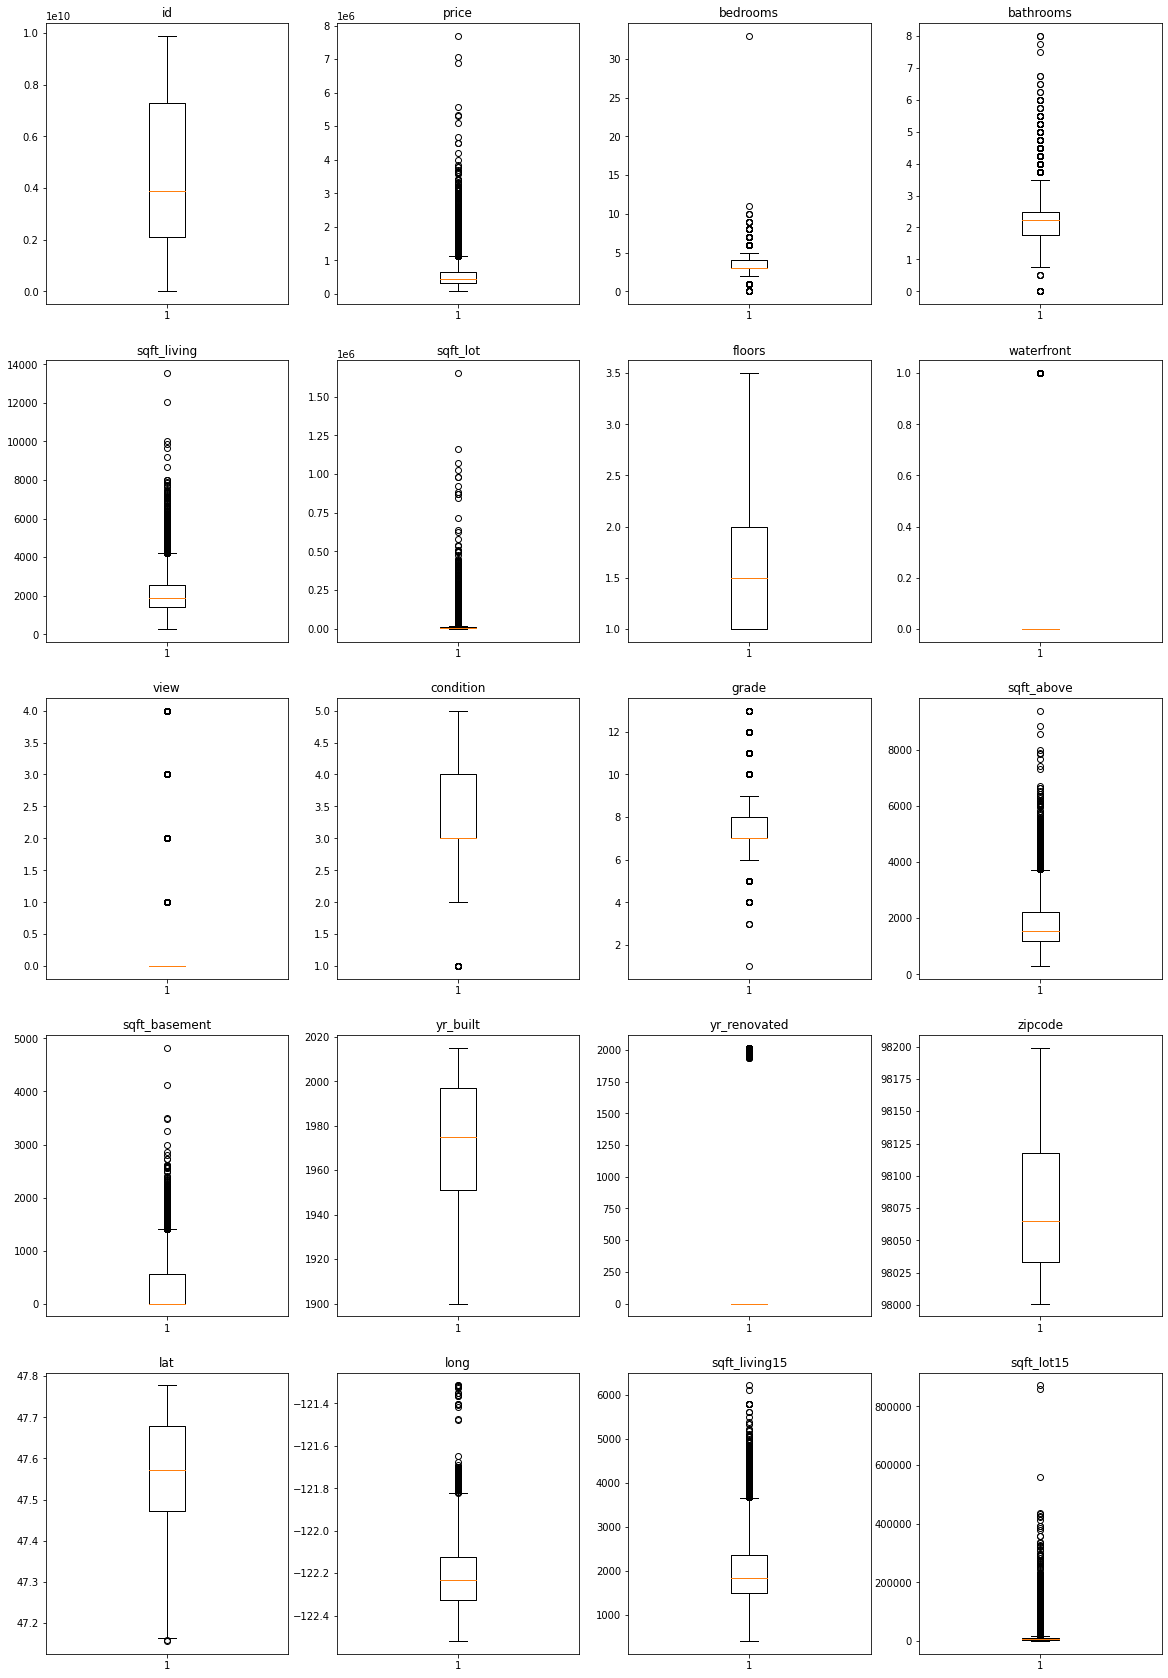

In [ ]:
# Checking for Outliers
# save the column names onto a dictionary
columns_dict={ 'id':1, 'price':2, 'bedrooms':3, 'bathrooms':4, 'sqft_living':5, 'sqft_lot':6,
       'floors':7, 'waterfront':8, 'view':9, 'condition':10, 'grade':11, 'sqft_above':12,
       'sqft_basement':13, 'yr_built':14, 'yr_renovated':15, 'zipcode':16, 'lat':17, 'long':18,
       'sqft_living15':19, 'sqft_lot15':20}

plt.figure(figsize=(20,30))

# make a boxplot for each numerical column
for variable,i in columns_dict.items():
  plt.subplot(5,4,i)
  plt.boxplot(house[variable])
  plt.title(variable)

plt.show()

#There are a number of outliers therefore we will need to remove th, as they would affect the coefficient of determination/R-squared and the y-intercept.

In [ ]:
# find quartile ranges for the column sum of bluecars_taken
q1_life_e = house['price'].quantile(.25)
q3_life_e = house['price'].quantile(.75)

# calculating inter-quartile range using values from above
iqr_life_e = q3_life_e - q1_life_e

# another way is to find quantiles using the percentiles from the numpy library
q1_l_e, q3_l_e = np.percentile(house['price'], [25, 75]) 
# IQR
iqr_l_e = q3_l_e - q1_l_e

# compare if the two values are similar
print(iqr_life_e, iqr_l_e)

323387.5 323387.5


Dealing with null values

In [ ]:
#Identifying any null values
house.isnull().sum()

#There are no null values in the dataset.

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#5. EXPLORATORY DATA ANALYSIS

## Univariate Analysis

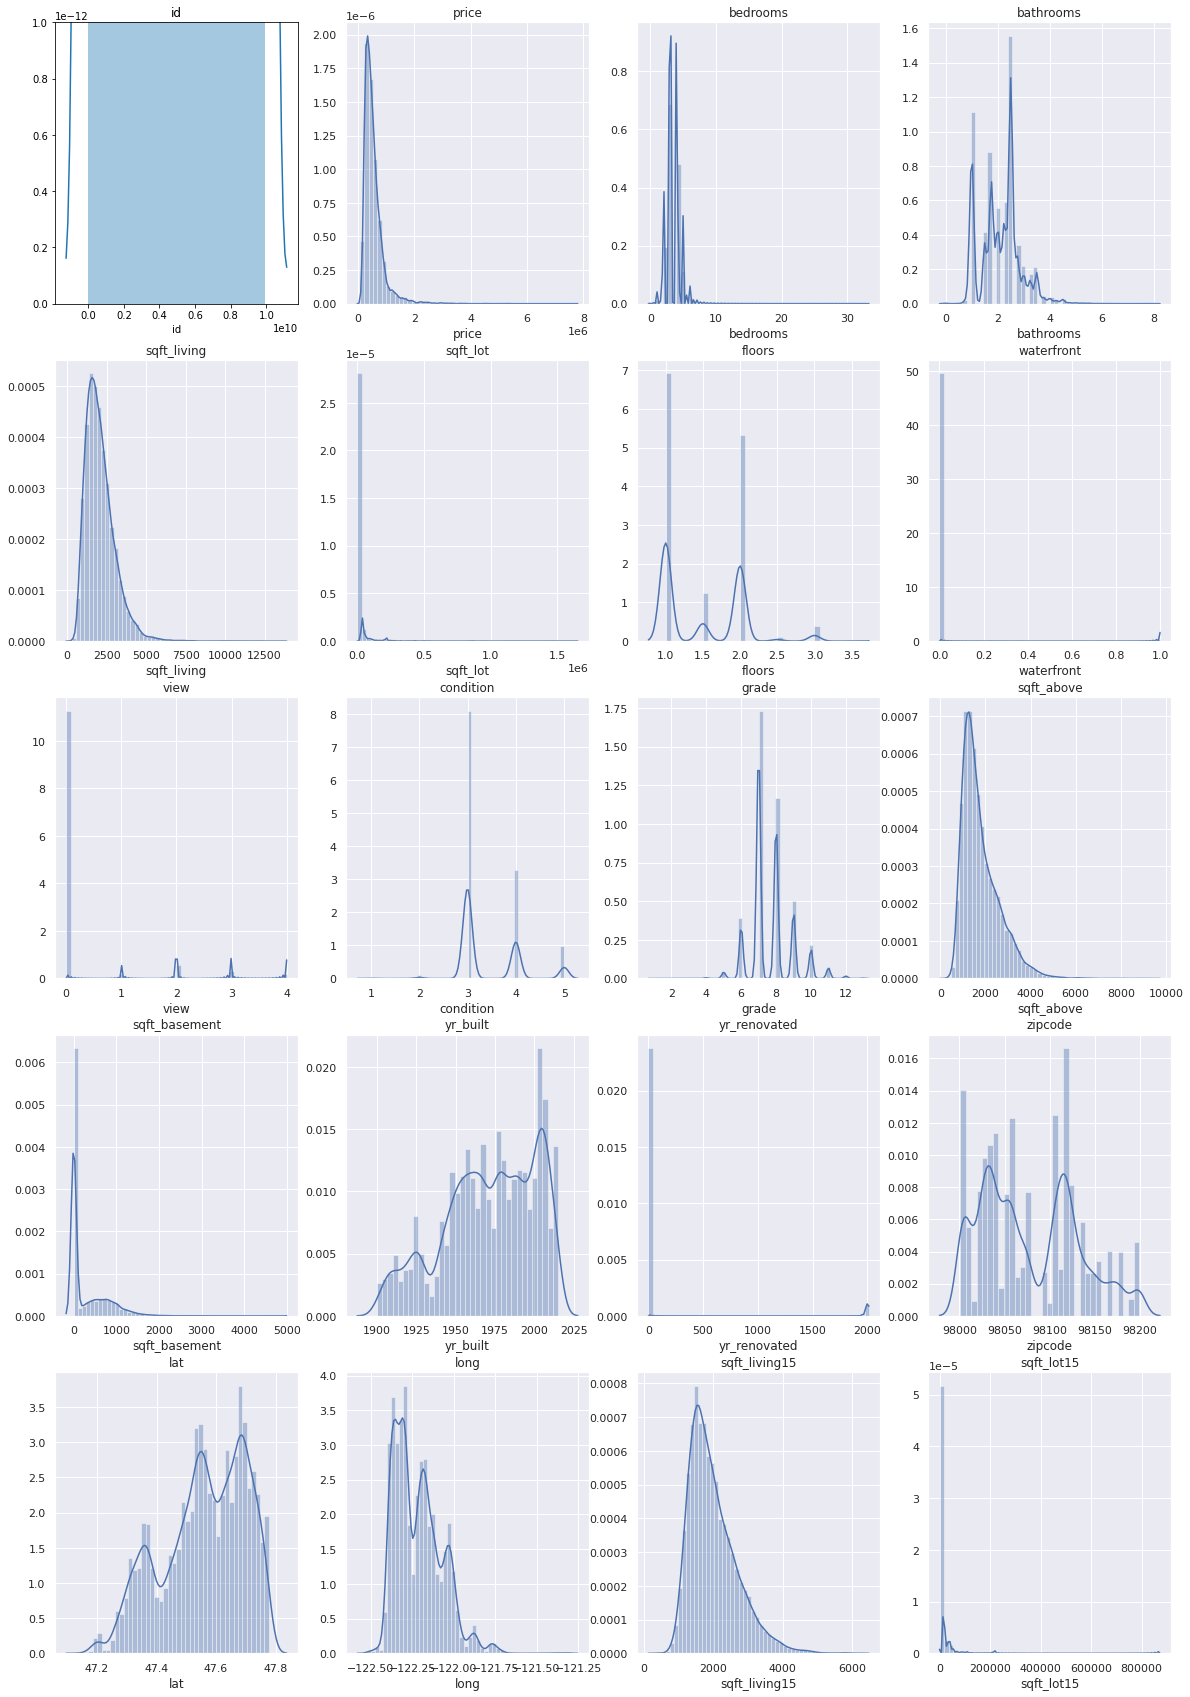

In [ ]:
# make a histogram plot for each variable column
plt.figure(figsize=(20,30) )

for variable,i in columns_dict.items():
  plt.subplot(5,4,i)
  sns.distplot(house[variable])
  sns.set(style='darkgrid')
  plt.title(variable)
plt.show()


In [ ]:
# Dataset description
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161000e+04,2.161000e+04,21610.000000,21610.000000,21610.000000,2.161000e+04,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000
mean,4.580161e+09,5.401789e+05,3.370847,2.114739,2079.881212,1.510829e+04,1.494239,0.007543,0.234197,3.409440,7.656779,1788.347894,291.533318,1971.003609,84.322351,98077.945673,47.560049,-122.213910,1986.518695,12769.031976
std,2.876547e+09,3.673876e+05,0.930110,0.770204,918.500299,4.142323e+04,0.539994,0.086523,0.766136,0.650764,1.175500,828.138723,442.596699,29.372639,401.499264,53.505373,0.138572,0.140833,685.425781,27305.972464
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.216125e+05,3.000000,1.750000,1425.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470925,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068875e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Bivariate analysis

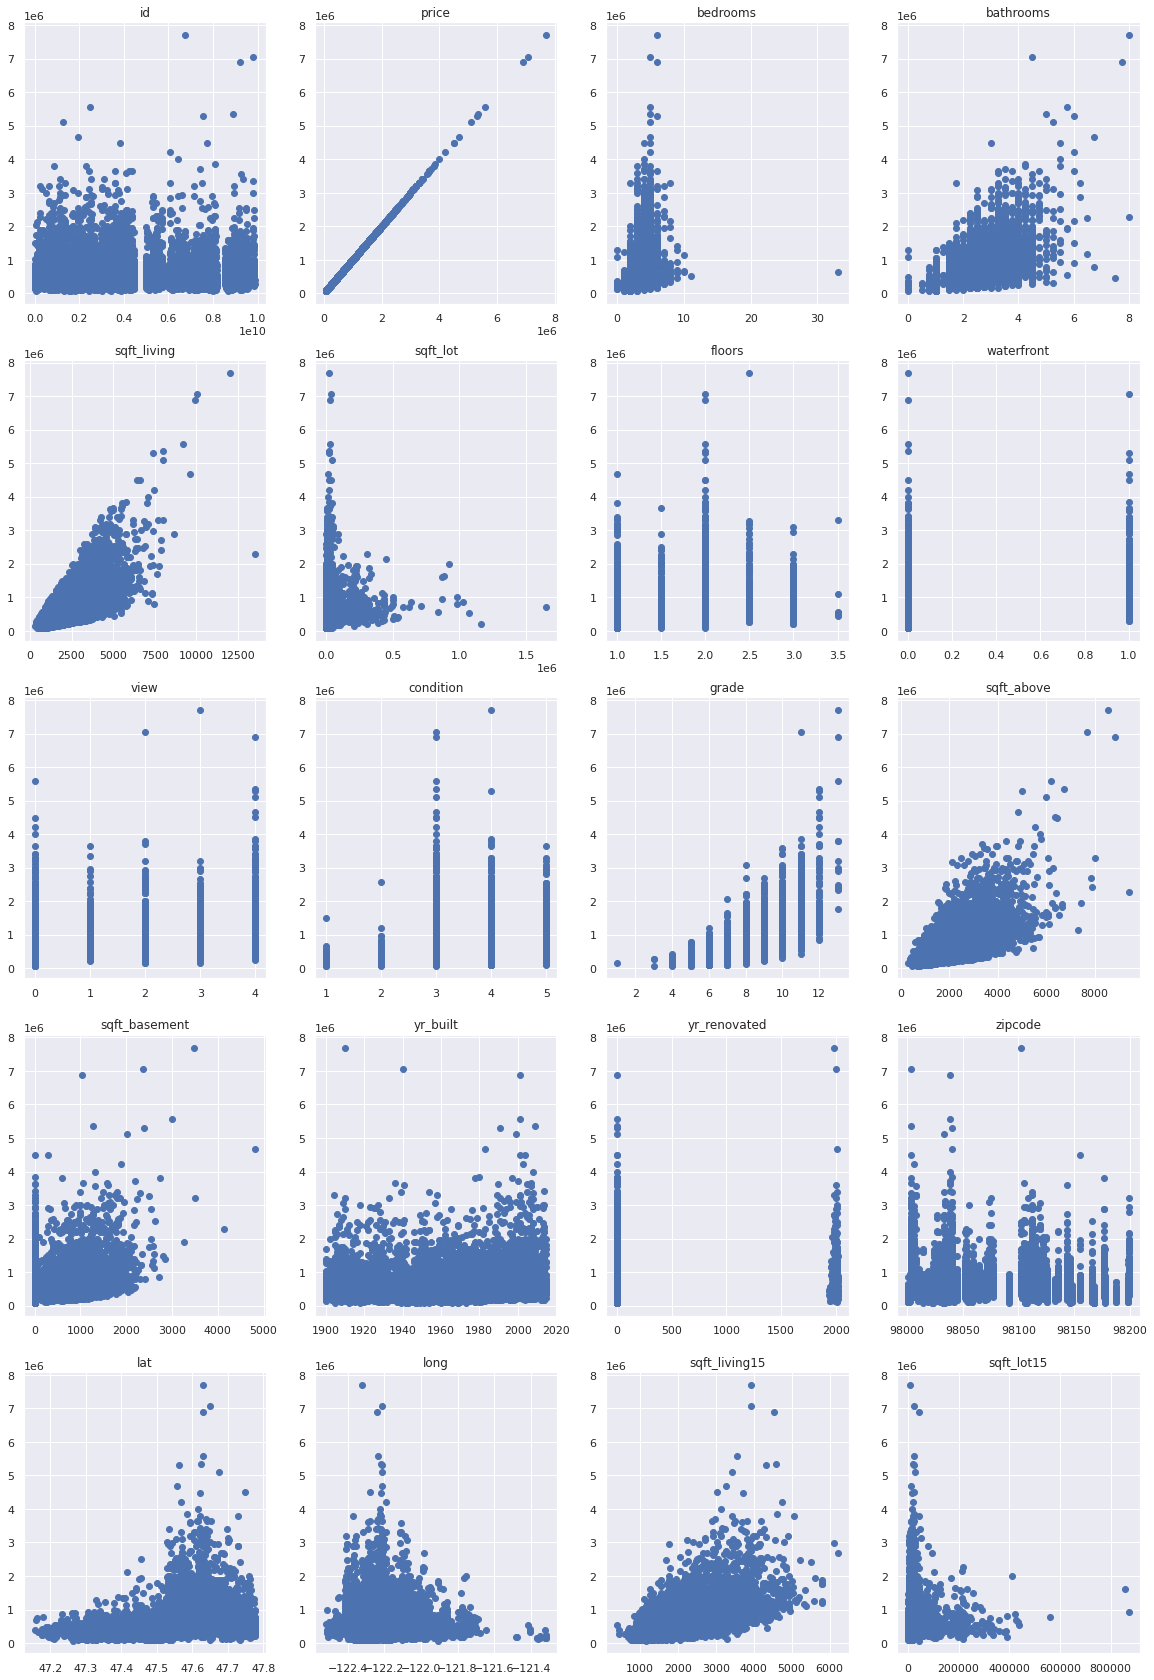

In [ ]:
# make a scatter plot for each variable column against price
plt.figure(figsize=(20,30) )

for variable,i in columns_dict.items():
  plt.subplot(5,4,i)
  plt.scatter(house[variable], house.price)
  sns.set(style='darkgrid')
  plt.title(variable)
plt.show()

- View, condition, grade, floors and waterfront are categorical values
- Bedrooms, bathrooms, sqft_living, sqft_above, sqft_basement and sqft_living15 have a positive linear relationship with the price of the house.

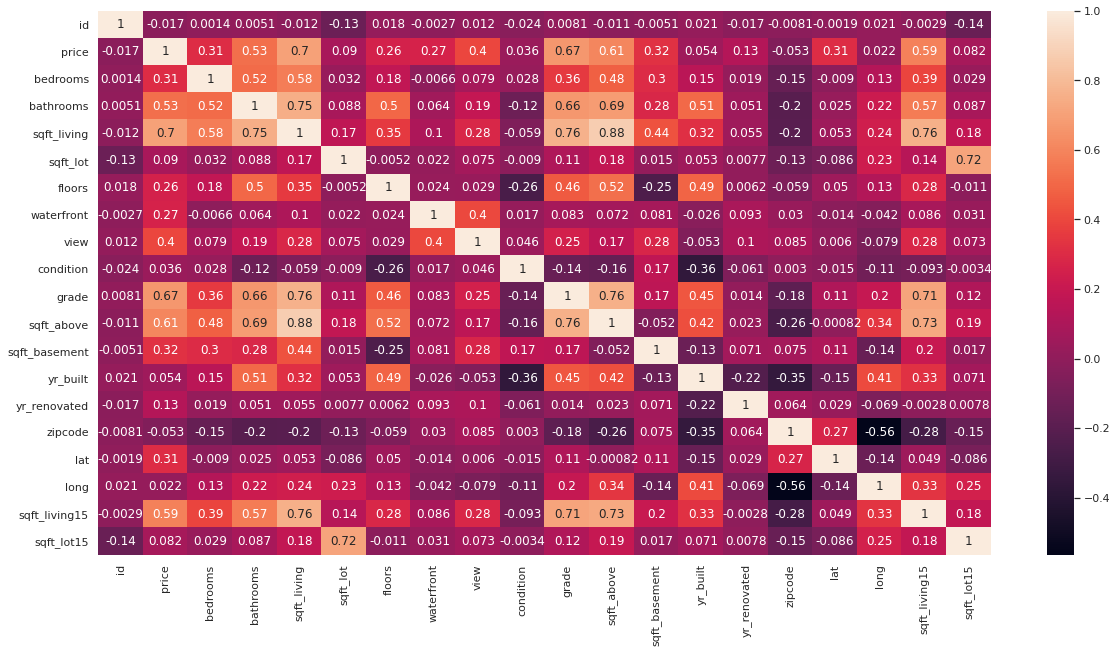

In [ ]:
#Plotting a heatmap
plt.figure(figsize=(20,10))
sns.heatmap(house.corr(), annot= True)

- Square foot living is highly positively correlated with price, bathrooms,grade, square foot above and square foot of ivinf area in the closest 15 houses in the neighbourhood.
Square foot of the lot area is highly positvely correlated with that of 15 closest houses in the neighbourhood.
Square foot of 15 closest houses in the neighbourhood are highly correlated to square foot of living area, grade and square foot above
-


## Multivariate Analysis

#6. IMPLEMENTING THE SOLUTION

## MULTIPLE LINEAR REGRESSION

Asumptions of Multivariate Linear Regression
- There are very few or no outliers in the dataset.
- Linearity: The relationship between X and the mean of Y is linear. There must be a linear relationship between the outcome variable and the independent variables. Scatterplots can show whether there is a linear or curvilinear relationship.
- Homoscedasticity: The variance of residual is the same for any value of X. Multiple regression assumes that the residuals are normally distributed.
- Independence: Observations are independent of each other.
- Normality: For any fixed value of X, Y is normally distributed.

Limitations

- Many difficulties tend to arise when there are more than five independent variables in a multiple regression equation. One of the most frequent is the problem that two or more of the independent variables are highly correlated to one another. This is called multicollinearity. If a correlation coefficient matrix with all the independent variables indicates correlations of .75 or higher, then there may be a problem with multicollinearity. 
- Multiple regression will not be good at explaining the relationship of the independent variables to the dependent variables if those relationships are not linear.

###Dealing with outliers and checking for multicollinearity.

In [ ]:
df = house
df. head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
#Picking the columns with continuous values
df1 = df[['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'sqft_above','sqft_basement','yr_built','sqft_living15', 'price', 'lat', 'long','sqft_lot15']]
df1

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,sqft_living15,price,lat,long,sqft_lot15
0,3,1.00,1180,5650,1180,0,1955,1340,221900.0,47.5112,-122.257,5650
1,3,2.25,2570,7242,2170,400,1951,1690,538000.0,47.7210,-122.319,7639
2,2,1.00,770,10000,770,0,1933,2720,180000.0,47.7379,-122.233,8062
3,4,3.00,1960,5000,1050,910,1965,1360,604000.0,47.5208,-122.393,5000
4,3,2.00,1680,8080,1680,0,1987,1800,510000.0,47.6168,-122.045,7503
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,1530,0,2009,1530,360000.0,47.6993,-122.346,1509
21609,4,2.50,2310,5813,2310,0,2014,1830,400000.0,47.5107,-122.362,7200
21610,2,0.75,1020,1350,1020,0,2009,1020,402101.0,47.5944,-122.299,2007
21611,3,2.50,1600,2388,1600,0,2004,1410,400000.0,47.5345,-122.069,1287


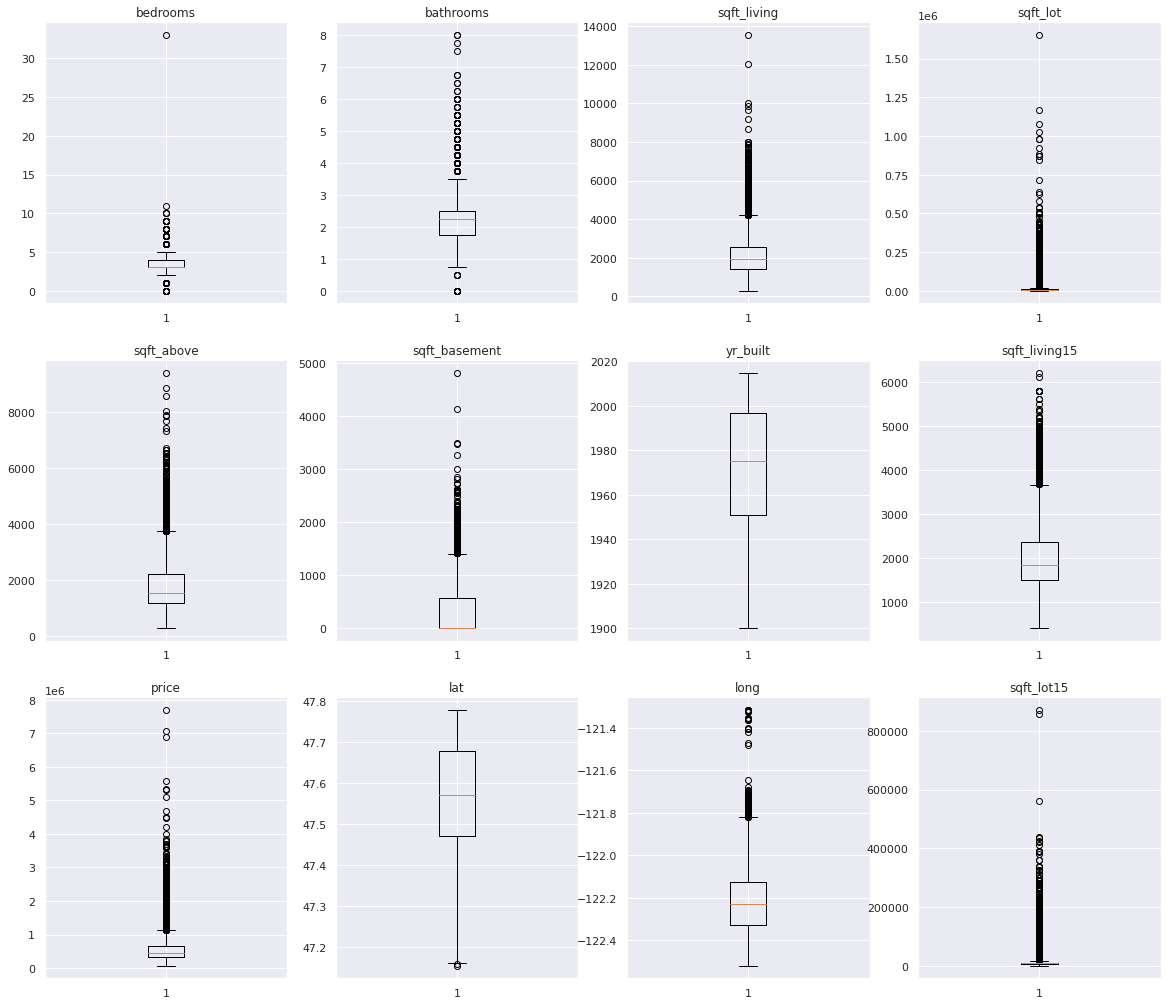

In [ ]:
# save the column names onto a dictionary
df1_dict={ 'bedrooms':1, 'bathrooms':2, 'sqft_living':3,'sqft_lot':4, 'sqft_above':5,'sqft_basement':6,'yr_built':7,'sqft_living15':8, 'price':9, 'lat':10, 'long':11,'sqft_lot15':12}

plt.figure(figsize=(20,30))

# make a boxplot for each numerical column
for variable,i in df1_dict.items():
  plt.subplot(5,4,i)
  plt.boxplot(df1[variable])
  plt.title(variable)

plt.show()

In [ ]:
# Dealing with outliers

print(f"Size of dataset with outliers: {df1.shape}")
# dealing with outliers
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
df1 = df1[~((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)]

print("...................")

print(f"Size of dataset after removal of outliers: {df1.shape}")

Size of dataset with outliers: (21610, 12)
...................
Size of dataset after removal of outliers: (17033, 12)


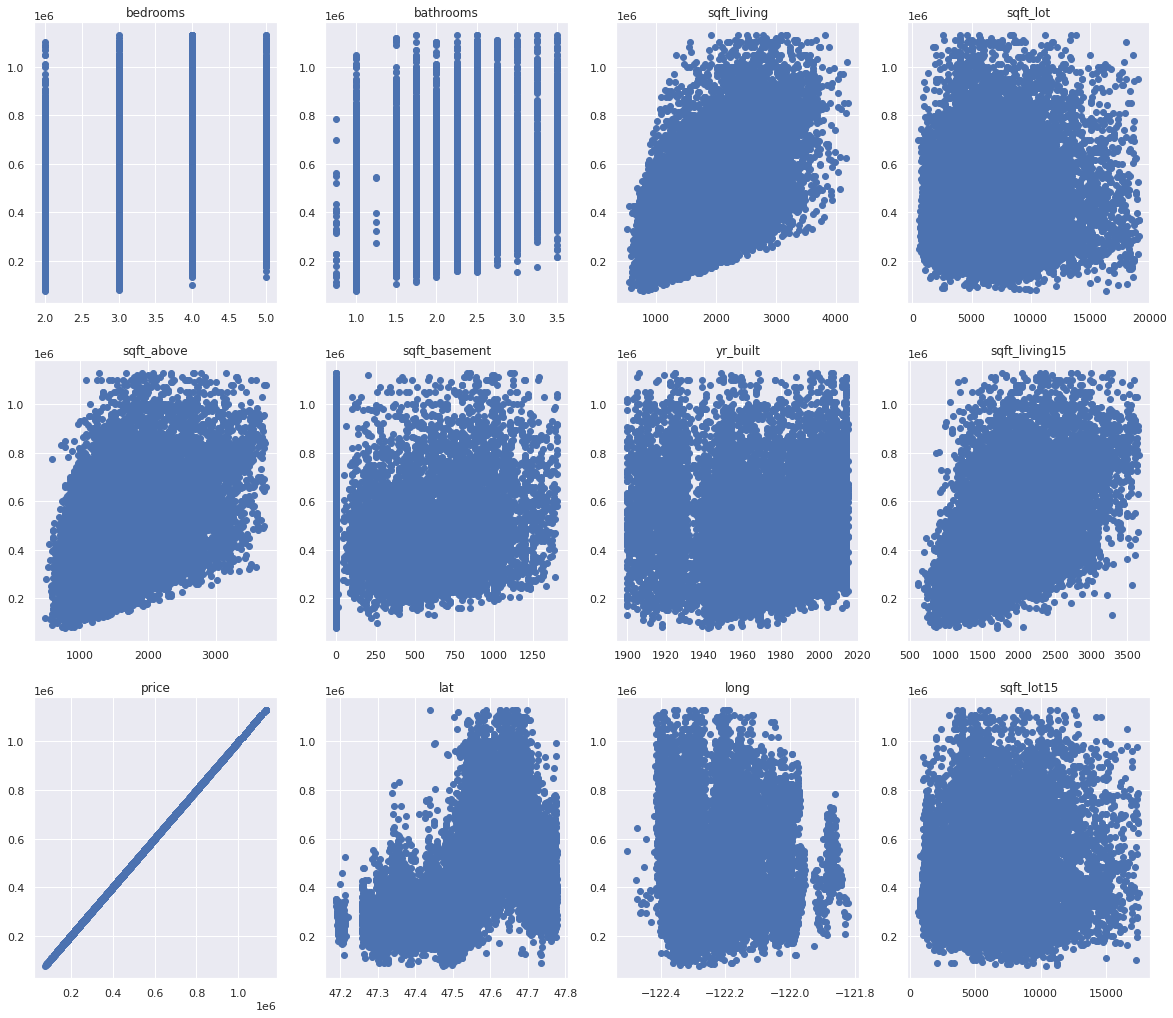

In [ ]:
# make a scatter plot for each variable column against price
plt.figure(figsize=(20,30) )

for variable,i in df1_dict.items():
  plt.subplot(5,4,i)
  plt.scatter(df1[variable], df1.price)
  sns.set(style='darkgrid')
  plt.title(variable)
plt.show()

#After removing the outliers sqft_living, sqft_lot, sqft_above, sqft_basement, sqft_living15 and sqft_lot15 
#have a somewhat linear relationship qith price and are therefore going to be used in the regression. 



- After removing the outliers sqft_living, sqft_lot, sqft_above, sqft_basement, sqft_living15 and sqft_lot15 have a somewhat linear relationship qith price and are therefore going to be used in the regression.

In [ ]:
df1.price.mean()

504530.2488060391

###Building the model

In [ ]:
# Get indexes where square basement is 0
indexNames = df1[(df1['sqft_basement'] == 0 )].index 
# Delete these row indexes from dataFrame
df1.drop(indexNames , inplace=True)
#Reading the new dataframe
df1.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,sqft_living15,price,lat,long,sqft_lot15
1,3,2.25,2570,7242,2170,400,1951,1690,538000.0,47.7210,-122.319,7639
3,4,3.00,1960,5000,1050,910,1965,1360,604000.0,47.5208,-122.393,5000
8,3,1.00,1780,7470,1050,730,1960,1780,229500.0,47.5123,-122.337,8113
11,2,1.00,1160,6000,860,300,1942,1330,468000.0,47.6900,-122.292,6000
15,4,3.00,2950,5000,1980,970,1979,2140,650000.0,47.5714,-122.375,4000


In [ ]:
# Preparing the Data
# Dividing the data into attributes and labels as we did previously. 

X = df1[[ 'sqft_above','sqft_basement','sqft_living15','sqft_lot15' ]]
y = df1['price']

#Checking for presence of multicollinearity in the independevariables.
# Square foor of living and lot have collineairty with square foor above and lot 15 repsectiveyly therfrfore were removed.
X.corr()


y.describe()

count    6.491000e+03
mean     5.045302e+05
std      1.973650e+05
min      1.000000e+05
25%      3.500000e+05
50%      4.750000e+05
75%      6.250000e+05
max      1.130000e+06
Name: price, dtype: float64

In [ ]:
# Dividing our data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training the Algorithm using the fit() method of the LinearRegression class
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Finding the most optimal coefficients for all the attributes. 
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
sqft_above,70585.970096
sqft_basement,31924.119381
sqft_living15,58703.794670
sqft_lot15,-62117.204375


In [ ]:
# Making Predictions
y_pred = regressor.predict(X_test)

# Comparing the actual output values for X_test with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
8675,242000.0,441061.213067
4525,320000.0,508124.839895
4303,330000.0,537123.654581
11497,580000.0,435388.901796
13304,271000.0,374511.073930
...,...,...
8871,279000.0,487665.751907
13650,350000.0,503376.416890
16523,585000.0,466738.409583
11665,410000.0,504534.956461


###Evaluating the model

In [ ]:
y.describe()

count    6.491000e+03
mean     5.045302e+05
std      1.973650e+05
min      1.000000e+05
25%      3.500000e+05
50%      4.750000e+05
75%      6.250000e+05
max      1.130000e+06
Name: price, dtype: float64

In [ ]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 122214.87187799823
Mean Squared Error: 23318632264.40628
Root Mean Squared Error: 152704.39503958714


 We can see that the value of root mean squared error is 152704.39503958714, which is twice as much greater than 10% of the mean value of price(504530). 
This means that our algorithm was not very accurate and therefore cannot be used make reasonably good predictions.
Therefore we need to look for a new model as the features with multicollinearity were not used.
There are many factors that may have contributed to this inaccuracy, a few of which are :
1. Need more data: Only one year worth of data isn't that much, 
 whereas having multiple years worth could have helped us improve the accuracy quite a bit.
 2. Bad assumptions: We made the assumption that this data has a linear relationship, but that might not be the case. Visualizing the data may help you determine that. 
3. Poor features: The features we used may not have had a high enough correlation to the values we were trying to predict.

Residual plots

In [ ]:
# Creating the residual plots
residuals = np.subtract(y_pred, y_test)

# Describing the residuals
pd.DataFrame(residuals).describe()


,price
count,1299.000000
mean,2544.361923
std,152741.999945
min,-571196.209846
25%,-97236.607387
50%,5563.551101
75%,113392.864016
max,601548.993880


Our min and max for the residual are fairly high: they suggest we've been off target. It's important for us to plot this first: Is this a common occurence, or a few outliers?

Our mean on the other hand is high, indicating that we tend to be fairly correct, although slightly over estimating chances by, on average, 2544.

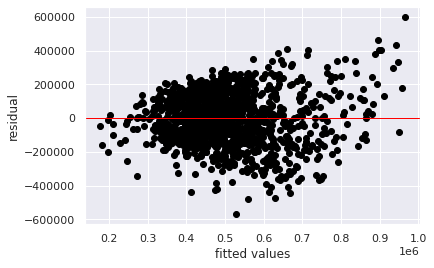

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

This does not look too bad: our residuals are centered around a mean that is very close to 0, there seems to be a slight pattern. To confirm we will perform a heteroskedasticity test.

For this we will use bartlett's test. The test establishes as a null hypothesis that the variance is equal for all our datapoints,and the new hypothesis that the variance is different for at least one pair of datapoints.

In [ ]:
#bartlett's test for heteroskedasticity
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)
print(test_result)
# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

1727.723819808327
60.086227797891446
the variances are homogeneous!


## QUANTILE REGRESSION

Assumptions made in Quantile regression
- Since it is an extension of Linear regression it assumes their is no multicollinearity between the independent variables.

Advantages of Quantile regression
- QR models the entire conditional distribution of the target variable, while OLS only delivers the mean estimates.
- QR makes no assumption on the target distribution, so is more robust to mis-specification of error distribution.
- QR is not sensitive to outliers. OLS estimates the conditional mean so is sensitive to outliers.
- QR is invariant to monotonic transformations, such as log(·), so the quantiles of h(y), a monotone transform of y, are h(Qq(y)), and the inverse transformation may be used to translate the results back to y.


Limitations of Quantile regression.
- It is time consuming computationally expensive

###Checking for multicollineairty using VIF

In [ ]:
#Checking for mutlitcollinearity
# Remove the id and price columns, we want to focus on our independent variables only.
multi= house
independent_only = multi.drop(columns=['id', 'price'])

# Let's display the correlations between the variables
correlations = independent_only.corr()

correlations

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.000000,0.515935,0.576674,0.031699,0.175448,-0.006583,0.079433,0.028422,0.357003,0.477619,0.303077,0.154276,0.018695,-0.152721,-0.008953,0.129474,0.391633,0.029233
bathrooms,0.515935,1.000000,0.754688,0.087750,0.500669,0.063747,0.187891,-0.124940,0.664990,0.685351,0.283814,0.505997,0.050879,-0.203831,0.024590,0.223047,0.568665,0.087191
sqft_living,0.576674,0.754688,1.000000,0.172830,0.353954,0.103820,0.284641,-0.058768,0.762719,0.876600,0.435054,0.318099,0.055314,-0.199435,0.052521,0.240221,0.756420,0.183285
sqft_lot,0.031699,0.087750,0.172830,1.000000,-0.005171,0.021601,0.074753,-0.008967,0.113644,0.183527,0.015271,0.053105,0.007677,-0.129611,-0.085680,0.229552,0.144620,0.718556
floors,0.175448,0.500669,0.353954,-0.005171,1.000000,0.023711,0.029325,-0.263779,0.458151,0.523874,-0.245673,0.489347,0.006156,-0.059025,0.049593,0.125343,0.279861,-0.011250
waterfront,-0.006583,0.063747,0.103820,0.021601,0.023711,1.000000,0.401993,0.016652,0.082785,0.072080,0.080585,-0.026159,0.092950,0.030277,-0.014272,-0.041904,0.086469,0.030702
view,0.079433,0.187891,0.284641,0.074753,0.029325,0.401993,1.000000,0.045836,0.251378,0.167659,0.276996,-0.053229,0.103208,0.084838,0.006049,-0.078560,0.280404,0.072577
condition,0.028422,-0.124940,-0.058768,-0.008967,-0.263779,0.016652,0.045836,1.000000,-0.144655,-0.158212,0.174071,-0.361347,-0.060862,0.002962,-0.014971,-0.106512,-0.092854,-0.003424
grade,0.357003,0.664990,0.762719,0.113644,0.458151,0.082785,0.251378,-0.144655,1.000000,0.755919,0.168443,0.446966,0.014372,-0.184795,0.114086,0.198347,0.713208,0.119265
sqft_above,0.477619,0.685351,0.876600,0.183527,0.523874,0.072080,0.167659,-0.158212,0.755919,1.000000,-0.051923,0.423922,0.023233,-0.261163,-0.000823,0.343791,0.731870,0.194060


The table above shows us how each variable relates to another. The coefficient of 1 across the diagonal makes sense, as a variable is perfectly correlated to itself. Let's use these correlations to compute the VIF score for each variable. 

In [ ]:
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.652159,-0.461426,-6.131806e-01,0.049327,0.049848,0.063078,0.114430,-0.050633,0.306941,-3.237657e-01,-1.881523e-01,0.134509,0.045800,0.080174,0.050839,0.017554,0.025284,0.085416
bathrooms,-0.461426,3.351248,-3.146032e+00,-0.024033,-0.675409,0.010097,-0.042387,-0.137265,-0.267927,1.566362e+00,4.385015e-01,-0.935745,-0.260436,0.041789,-0.041080,0.053741,0.092020,0.071444
sqft_living,-0.614125,-3.147527,1.814600e+13,-0.083836,2.725995,-0.075267,-0.010738,-0.174659,-1.942256,-1.636081e+13,-8.743992e+12,0.465511,0.157235,-0.351953,-0.055686,0.225522,-1.068731,-0.050464
sqft_lot,0.049327,-0.024033,-8.472318e-02,2.102526,0.045181,0.027369,-0.059109,0.030522,-0.053865,-1.229640e-01,-1.799981e-03,0.098734,0.021295,-0.002580,0.053339,-0.133206,0.163933,-1.459308
floors,0.049848,-0.675409,2.727895e+00,0.045181,2.011974,-0.005524,-0.040067,0.089832,-0.230827,-2.964235e+00,-6.995572e-01,-0.481324,-0.079986,-0.170816,-0.127521,0.164281,0.272632,0.072657
waterfront,0.063078,0.010097,-7.563028e-02,0.027369,-0.005524,1.203970,-0.492855,-0.012820,0.049272,-4.380875e-02,3.280588e-02,-0.021102,-0.065851,0.022562,0.009815,0.027241,0.054397,-0.018480
view,0.114430,-0.042387,-9.767467e-03,-0.059109,-0.040067,-0.492855,1.435320,-0.021126,-0.185270,4.816459e-02,-2.516918e-01,0.151685,-0.039119,-0.140639,0.118633,0.071934,-0.325388,-0.007469
condition,-0.050633,-0.137265,-1.749044e-01,0.030522,0.089832,-0.012820,-0.021126,1.249500,-0.054508,2.132228e-01,-1.323553e-02,0.561510,0.206913,0.161279,0.063727,-0.006876,0.075908,-0.028242
grade,0.306941,-0.267927,-1.945115e+00,-0.053865,-0.230827,0.049272,-0.185270,-0.054508,3.416981,1.441457e-01,4.510090e-01,-0.638907,-0.071472,0.083155,-0.330860,0.393716,-0.911600,0.071863
sqft_above,-0.321458,1.564793,-1.636081e+13,-0.123737,-2.962207,-0.044143,0.049025,0.212984,0.141509,1.475124e+13,7.883763e+12,0.100178,-0.142897,0.241689,0.231229,-0.545073,-0.572072,-0.130215


Btahroom has a score of 3.35, grade has a score of 3.41, square foot of living, square foot of above and basement have very high scores therefore will be dropped.

VIF interpretation: 
- In general, a VIF above 10 indicates high correlation and is cause for concern. Some authors suggest a more conservative level of 2.5 or above.

1 = not correlated.

Between 1 and 5 = moderately correlated.

Greater than 5 = highly correlated.

Grade has a the highest value above 2.5, let's see how the VIF scores improve if we remove it from our dataset

In [ ]:
revised1 = independent_only.drop(columns=['sqft_living', 'sqft_above', 'sqft_basement'])

correlations = revised1.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.459639,-0.797621,0.015625,0.072855,0.047175,0.081416,-0.057630,0.013440,0.242510,0.043538,0.057631,0.063493,-0.007161,-0.255790,0.052407
bathrooms,-0.797621,2.695228,-0.070430,-0.470760,-0.006948,-0.151196,-0.173065,-0.706067,-0.754958,-0.266856,-0.004826,-0.052337,0.072536,-0.329150,0.020730
sqft_lot,0.015625,-0.070430,2.094376,0.019485,0.022647,-0.055643,0.033559,-0.118689,0.119053,0.021345,-0.005216,0.061582,-0.148729,0.102139,-1.466339
floors,0.072855,-0.470760,0.019485,1.616759,-0.029218,0.085952,0.146938,-0.373277,-0.475583,-0.073820,-0.150826,-0.049442,0.019401,0.139986,0.060065
waterfront,0.047175,-0.006948,0.022647,-0.029218,1.200987,-0.487621,-0.009729,0.013451,-0.010965,-0.065653,0.021828,0.016050,0.015559,0.020338,-0.022285
view,0.081416,-0.151196,-0.055643,0.085952,-0.487621,1.391689,-0.039828,-0.180383,0.164405,-0.041340,-0.149884,0.096047,0.113678,-0.321881,-0.007985
condition,-0.057630,-0.173065,0.033559,0.146938,-0.009729,-0.039828,1.241178,-0.039722,0.562762,0.205986,0.157980,0.052775,0.013422,0.089528,-0.027071
grade,0.013440,-0.706067,-0.118689,-0.373277,0.013451,-0.180383,-0.039722,2.889233,-0.465822,-0.072253,0.056611,-0.275567,0.289168,-1.415296,0.014060
yr_built,0.242510,-0.754958,0.119053,-0.475583,-0.010965,0.164405,0.562762,-0.465822,2.368748,0.534713,0.268625,0.299542,-0.484607,0.243273,-0.014442
yr_renovated,0.043538,-0.266856,0.021345,-0.073820,-0.065653,-0.041340,0.205986,-0.072253,0.534713,1.150383,0.036282,0.045099,-0.052172,0.098462,-0.022335


In [ ]:
revised = revised1.drop(columns=['bathrooms', 'grade'])

correlations = revised.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,bedrooms,sqft_lot,floors,waterfront,view,condition,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.209458,-0.015133,-0.102364,0.045960,0.020767,-0.114996,-0.028887,-0.045713,0.060204,0.027090,0.036585,-0.461754,0.059951
sqft_lot,-0.015133,2.085581,-0.018000,0.023055,-0.070750,0.024723,0.065672,0.007163,-0.002536,0.045544,-0.131205,0.017392,-1.464809
floors,-0.102364,-0.018000,1.443340,-0.028296,0.019145,0.101090,-0.729308,-0.146536,-0.141505,-0.111706,0.088662,-0.193240,0.067265
waterfront,0.045960,0.023055,-0.028296,1.200919,-0.487064,-0.009809,-0.010057,-0.065730,0.021577,0.017159,0.014421,0.025948,-0.022316
view,0.020767,-0.070750,0.019145,-0.487064,1.365311,-0.056456,0.068070,-0.067875,-0.145653,0.069579,0.142817,-0.462494,-0.005237
condition,-0.114996,0.024723,0.101090,-0.009809,-0.056456,1.227390,0.493412,0.184379,0.159411,0.040316,0.027772,0.021164,-0.025127
yr_built,-0.028887,0.065672,-0.729308,-0.010057,0.068070,0.493412,1.994438,0.425079,0.280854,0.213896,-0.388667,-0.217383,-0.003853
yr_renovated,-0.045713,0.007163,-0.146536,-0.065730,-0.067875,0.184379,0.425079,1.116489,0.038713,0.024710,-0.028789,-0.013061,-0.019258
zipcode,0.060204,-0.002536,-0.141505,0.021577,-0.145653,0.159411,0.280854,0.038713,1.657598,-0.304308,0.731355,0.214795,-0.018986
lat,0.027090,0.045544,-0.111706,0.017159,0.069579,0.040316,0.213896,0.024710,-0.304308,1.131712,-0.034838,-0.209617,0.044667


Almost all values are close to one(both positve and negative), which indicates very low level of multicollinearity among the variables. Th e variables square foot living, above, basement, bathroom and grade were strongly correlated with two other variables (which was indicated by a high value of variance infl ation factor), and that is why ‘dar’ was dropped from the 2001 analysis.
 

In [ ]:
revised.columns

Index(['bedrooms', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

###Building the model

In [ ]:
df2 = house[['price','bedrooms', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15']]
df2.head()

,price,bedrooms,sqft_lot,floors,waterfront,view,condition,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,5650,1.0,0,0,3,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,7242,2.0,0,0,3,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,10000,1.0,0,0,3,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,5000,1.0,0,0,5,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,8080,1.0,0,0,3,1987,0,98074,47.6168,-122.045,1800,7503


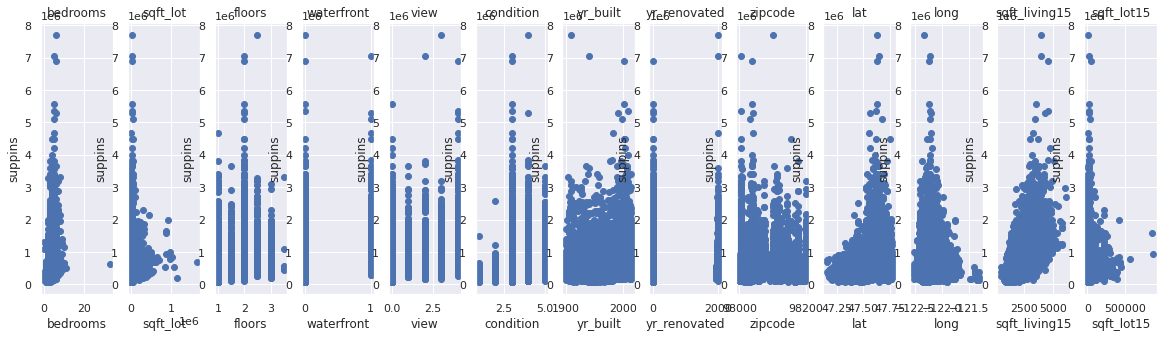

In [ ]:
plt.figure(figsize=(20, 5))

features = ['bedrooms', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15']
target = df2['price']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df2[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('suppins')

In [ ]:
from sklearn import preprocessing
independent = df2[features]
dependent = df2['price']
# Standardize the variables
# It is not necessary to standardize the target. I do it just for convenience.
X_scaled = pd.DataFrame(preprocessing.scale(independent))
Y_scaled = preprocessing.scale(dependent)
X_scaled.columns = features

R Squared score is 0.57


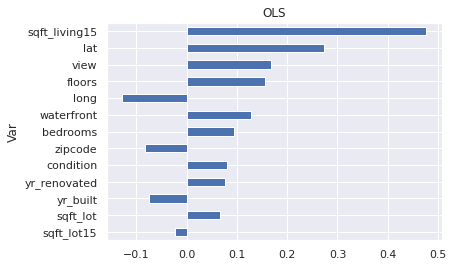

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size = 0.2, random_state=5)

lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

# model evaluation for testing set
y_test_predict = lin_reg.predict(X_test)
r2 = metrics.r2_score(Y_test, y_test_predict).round(2)
print('R Squared score is {}'.format(r2) )

# Plot the coefficients of hte in descending order
w = pd.DataFrame()
w['Var'] = X_train.columns
w = w.set_index('Var') # Set the variable names as the index
w['beta'] = lin_reg.coef_
w['beta_abs'] = np.abs(w['beta']) # Get the absolute value for ranking
w = w.sort_values(by='beta_abs')
w['beta'].plot.barh()
plt.title('OLS')
plt.show()

In [ ]:
import statsmodels.regression.quantile_regression as Q_reg
import matplotlib.pyplot as plt

quantiles = [0.25, 0.5, 0.75]

# Get the model, and the cofficients in (a) - (b)
def Qreg(q):
   # (a) Modeling 
   mod = Q_reg.QuantReg(Y_train, X_train).fit(q=q)
    
   # (b) Get the coefficients and the lower and upper bounds
   coefs = pd.DataFrame()
   coefs['param'] = mod.params
   coefs = pd.concat([coefs,mod.conf_int()],axis=1) # "mod.conf_int" will give the lower and upper bounds
   coefs['q'] = q 
   coefs.columns = ['coef','beta_lower','beta_upper','quantile']
    
   return coefs

Qreg_coefs = pd.DataFrame() # why are we having this?
for q in quantiles:
    coefs = Qreg(q)
    Qreg_coefs = pd.concat([Qreg_coefs,coefs]) # why are we joining the two, what is contained in either

# Get the R-squared for Q=0.5
q = 0.5
Y_test_pred1 = Q_reg.QuantReg(Y_train, X_train).fit(q=0.25).predict(X_test)
Y_test_pred2 = Q_reg.QuantReg(Y_train, X_train).fit(q=0.5).predict(X_test)
Y_test_pred3 = Q_reg.QuantReg(Y_train, X_train).fit(q=0.75).predict(X_test)
r2 = metrics.r2_score(Y_test,y_test_predict)
print('R2 score for the 50th percentile is {}'.format(r2) ) # 0.490744 we choose the 50th percentile because we want to compare with LR

R2 score for the 50th percentile is 0.5728187930491728


In [ ]:
print("The mean squared error for the linear model:",metrics.mean_squared_error(Y_test, y_test_predict))

The mean squared error for the linear model: 0.4168636402958427


In [ ]:
print("The mean squared error for the quantile model:",metrics.mean_squared_error(Y_test, Y_test_pred2))

The mean squared error for the quantile model: 0.4392540623228162


In [ ]:
comparison = pd.DataFrame({'Actual': Y_test,'Linear': y_test_predict,'50th Quantile': Y_test_pred2,'25th Quantile':Y_test_pred1,'75th Quantile':Y_test_pred3})
comparison.describe()

,Actual,Linear,50th Quantile,25th Quantile,75th Quantile
count,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000
mean,-0.002948,-0.004118,-0.002582,-0.002321,-0.002799
std,0.987964,0.724603,0.608303,0.606349,0.609413
min,-1.241712,-1.724999,-1.428788,-1.426221,-1.430219
25%,-0.599324,-0.488548,-0.414866,-0.414988,-0.415077
50%,-0.237300,-0.085076,-0.060334,-0.060012,-0.059234
75%,0.285321,0.368615,0.307236,0.309476,0.307008
max,17.284111,4.179156,3.625570,3.540239,3.692433


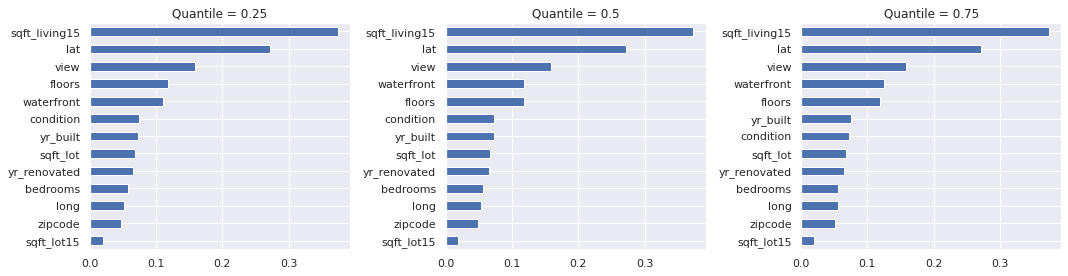

In [ ]:
# Get the absolute value of the coefficients for ranking
Qreg_coefs['coef_abs'] = np.abs(Qreg_coefs['coef'] ) 
Qreg_coefs = Qreg_coefs.sort_values(by=['quantile','coef_abs'])

fig = plt.figure(figsize=(15, 4))

n = len(quantiles)
#Plotting the absolute coefficients
for i in range(n):
    plt.subplot(1, n, i+1)
    w = Qreg_coefs[Qreg_coefs['quantile']==quantiles[i]]
    w['coef_abs'].plot.barh()
    plt.title('Quantile = ' + str(quantiles[i] ))

fig.tight_layout()
plt.show()

NameError: ignored

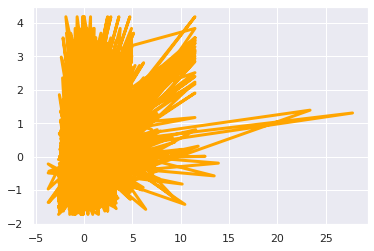

In [ ]:
plt.figure(5)
#plt.scatter(X_test , Y_test,  color='blue')

plt.plot(X_test, y_test_predict, color='orange',linewidth=3, label='Lin Reg')
y_test_pred1 = models[0].params['Intercept'] + models[0].params['x'] * x_
plt.plot(X_test, Y_test_pred1, color='red',linewidth=3, label='Q Reg : 0.25')

plt.plot(X_test, Y_test_pred2, color='green',
         linewidth=3, label='Q Reg : 0.5')


plt.plot(X_test, Y_test_pred3, color='cyan',linewidth=3, label='Q Reg : 0.75')

plt.xticks(())
plt.yticks(())
plt.xlabel("x")
plt.ylabel("y and predicted y")
plt.title("Quantile regression vs Linear Regression")
plt.legend()

## RIDGE REGRESSION

When to use:
- Ridge estimator is good at improving the least squares estimates when there is multicollinearity as in our data.
- When we have large multivariate data with number of predictors being larger than number of obervartions.

Advantage
- Avoids overfitting a model. Ridge regression uses L2 regularization and tries to estimate the mean of the data to avoid overfitting.
- Has better prediction power than Lasso.

In [ ]:
# Importing our libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [ ]:
#Creating a variable with the dataframe and reading it.
df3 = house
df3.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
#Dropping the unneccessary column
df3 = df3.drop(['id'], axis= 1)
df3.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
#Checking if the id columns has been dropped
df3.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
# Setting up our X and y datasets
#
X = df3[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']]
y = df3['price']
print(X)


       bedrooms  bathrooms  sqft_living  ...     long  sqft_living15  sqft_lot15
0             3       1.00         1180  ... -122.257           1340        5650
1             3       2.25         2570  ... -122.319           1690        7639
2             2       1.00          770  ... -122.233           2720        8062
3             4       3.00         1960  ... -122.393           1360        5000
4             3       2.00         1680  ... -122.045           1800        7503
...         ...        ...          ...  ...      ...            ...         ...
21608         3       2.50         1530  ... -122.346           1530        1509
21609         4       2.50         2310  ... -122.362           1830        7200
21610         2       0.75         1020  ... -122.299           1020        2007
21611         3       2.50         1600  ... -122.069           1410        1287
21612         2       0.75         1020  ... -122.299           1020        1357

[21610 rows x 18 columns]


In [ ]:
#Standardizing our features
scaler = StandardScaler()
X = scaler.fit_transform(X)
#Normalizing the data
#from sklearn import preprocessing
#X = preprocessing.normalize(X)
#print(X)

In [ ]:
# Creating our baseline regression model
# This is a model that has no regularization to it
regression = LinearRegression()
regression.fit(X,y)
first_model = (mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_model)

# The output  value of 40516476382.74068 will be our indicator to determine if the regularized ridge regression model is superior or not.

40516476382.74068


In [ ]:
# In order to create our ridge model we need to first determine the most appropriate value for the l2 regularization. 
# L2 is the name of the hyperparameter that is used in ridge regression. 
# Determining the value of a hyperparameter requires the use of a grid. 
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [ ]:
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
search.fit(X,y)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_) 

# The best_params_ tells us what to set alpha too which in this case is 0.01. 
# The best_score_ tells us what the best possible mean squared error is. 
# In this case, the value of 41014661978.93079 is worse than what the baseline model was.

41056391892.679

In [ ]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(second_model)

40522796287.947075


In [ ]:
# The 40522796287.947075 is lower than the 41056391892.679. This is because the last results are not cross-validated. 
# In addition, these results indicate that there is little difference between the ridge and baseline models. 
# This is confirmed with the coefficients of each model found below.
# 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,df3.columns):
    coef_dict_baseline[feat] = coef
print(coef_dict_baseline)

coef_dict_ridge = {}
for coef, feat in zip(ridge.coef_,df3.columns):
    coef_dict_ridge[feat] = coef
print(coef_dict_ridge)

# The coefficient values are about the same. This means that the penalization made little difference with this dataset.
#How do we know how the coefficient values are the smae or not?

{'id': -33268.05497234104, 'price': 31644.22657638458, 'bedrooms': 81859.88392555914, 'bathrooms': 5307.677982998966, 'sqft_living': 3658.0870533337893, 'sqft_lot': 50406.936942699605, 'floors': 40633.993072826175, 'waterfront': 17214.11571424837, 'view': 112829.4663803358, 'condition': 76348.83565818366, 'grade': 27024.378106840762, 'sqft_above': -77019.02126333177, 'sqft_basement': 8044.255751518341, 'yr_built': -31175.968032212786, 'yr_renovated': 83545.8442714875, 'zipcode': -30243.046282660136, 'lat': 14868.255021666388, 'long': -10440.013914670053}
{'id': -32126.525375760684, 'price': 31428.949994336217, 'bedrooms': 80996.09907171692, 'bathrooms': 5257.037868551579, 'sqft_living': 3986.969974660104, 'sqft_lot': 50039.324411917645, 'floors': 40652.64477643122, 'waterfront': 17459.81995339028, 'view': 110748.7970785111, 'condition': 75372.9875389402, 'grade': 27057.706348027954, 'sqft_above': -75135.1654402838, 'sqft_basement': 8480.524507251936, 'yr_built': -30024.164066907662, 'y

Limitation of ridge regression:
- It is unable to perform feature selection therefore including all predictors in the model as it shrinks the coefficients towards zero but never reaches 0.
- Vraiance traded for bias 



## LASSO REGRESSION

When to use :
- Good at improving the absolute estimates when there is multicollinearity as in our data.
- When we have large multivariate data with number of predictors being larger than number of obervartions.

Advantage:
- Lasso regression uses L1 regularization and tries to estimate the median of the data to avoid overfitting
- Shrinking of coefficients to 0, therefore dropping those variates from your model. 

In [ ]:
df4= house
df4.drop(['id'], axis=1)
df4

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
# Before building the models, let's first scale data. 
# Creating features and target matrixes
X = df4[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']]
y = df4['price']
print(X)

# Scaling data 
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
 #It is necessary to standardize variables before using Lasso and Ridge Regression. 
 #Lasso regression puts constraints on the size of the coefficients associated to each variable. 
 #However, this value will depend on the magnitude of each variable.

       bedrooms  bathrooms  sqft_living  ...     long  sqft_living15  sqft_lot15
0             3       1.00         1180  ... -122.257           1340        5650
1             3       2.25         2570  ... -122.319           1690        7639
2             2       1.00          770  ... -122.233           2720        8062
3             4       3.00         1960  ... -122.393           1360        5000
4             3       2.00         1680  ... -122.045           1800        7503
...         ...        ...          ...  ...      ...            ...         ...
21608         3       2.50         1530  ... -122.346           1530        1509
21609         4       2.50         2310  ... -122.362           1830        7200
21610         2       0.75         1020  ... -122.299           1020        2007
21611         3       2.50         1600  ... -122.069           1410        1287
21612         2       0.75         1020  ... -122.299           1020        1357

[21610 rows x 18 columns]


In [ ]:
#Getting R-squared

# Importing linear models
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Creating lasso object
lasso = linear_model.Lasso() 

# Fitting the models, why do we train the whole model
lasso.fit(X, y) 

# Print scores, MSE, and coefficients
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.6998054426678352
lasso MSE: 40516476424.81792
lasso coef: [-33266.88233668  31637.6631829  259485.35635095   5304.44525436
   3657.82919038  50406.18341507  40634.06469055  17213.01805439
 112832.08022218 -83795.31887747 -58563.3849552  -77017.13543297
   8043.51869173 -31173.4407627   83544.44491153 -30240.53390784
  14862.22210763 -10437.22505233]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27081817033600.75, tolerance: 291664533601.623
  positive)


In [ ]:
# Splitting the data into training and test sets, building Lasso, 
# and choosing the regularization parameter with the help of GridSearch. 
# For that, we have to define the set of parameters for GridSearch. 
# In this case, a model with the highest R-squared score will give us the best parameters.
# 

# Making necessary imports, split data into training and test sets, and choose a set of parameters 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
# alpha set to  a range between 0.1 and 2 with 0.1 intervals
linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 24.0}
lasso score: 0.7048549907510334
linear score: 0.7049715277486102
lasso MSE: 40137362943.68444
linear MSE: 40121514843.186295
lasso best estimator coef: [-33498.54420994  29163.04166888 209585.24155778   5164.47444239
   4407.61294344  45868.63922007  42462.9295721   16496.5834434
 112536.31786789 -36375.16341284 -31750.32900409 -75967.88554473
   6724.89795266 -31568.90621004  84407.91149052 -29206.2002946
  11661.01791709 -10298.77344216]
linear coef: [-3.48454584e+04  2.89583267e+04  1.93746287e+18  4.45041645e+03
  4.18779520e+03  4.60107055e+04  4.21729026e+04  1.63693780e+04
  1.12303885e+05 -1.74685630e+18 -9.33603041e+17 -7.58595823e+04
  7.40697842e+03 -3.14142044e+04  8.44455939e+04 -2.89196415e+04
  1.18389975e+04 -9.64933925e+03]


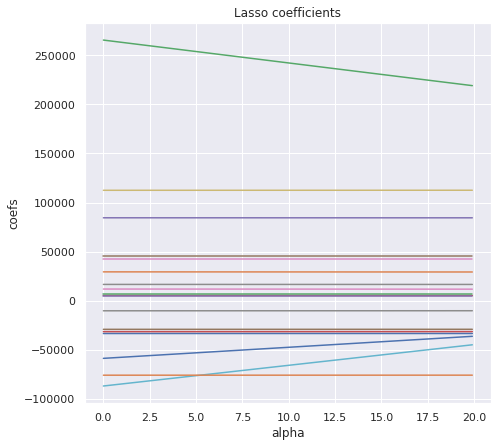

In [ ]:
# Importing library for visualization
#
import matplotlib.pyplot as plt
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

# As we can see, Lasso influences less on the large coefficients, but the small ones Lasso reduces to zeroes. 
# Therefore Lasso can also be used to determine which features are important 
# to us and keeps the features that may influence the target variable

Limitation of Lasso
- For n << p case (high dimensional case), LASSO can at most select n features. This has to do with the nature of convex optimization problem LASSO tries to minimize.
- Even for n>>p case, it is seen that for correlated features , Ridge (Tikhonov Regularization) regression has better prediction power than LASSO. Though Ridge won't help in feature selection and model interpretability is low.
- For usual case where we have correlated features which is usually the case for real word datasets, LASSO will select only one feature from a group of correlated features. That selection also happens to be arbitrary in nature. Often one might not want this behavior. Like in gene expression the ideal gene selection method is: eliminate the trivial genes and automatically include whole groups into the model once one gene among them is selected (‘grouped selection’). LASSO doesn't help in grouped selection.

## ELASTIC NET REGRESSION

When to use:
Since it combines both ridge and elastic net it can be used when both their conditions are met. For example when we have a really huge dataset with lots of columns and fewer rows that also have multicollinearity.
Advantage
- Elastic Net combines feature elimination from Lasso and feature coefficient reduction from the Ridge model to improve your model's predictions.
- It doesn't have the problem of selecting more than n predictors when p≫n. Whereas lasso saturates when p≫n.

In [ ]:
#Importing the libraries we will need
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

First baseline model

In [ ]:
#Creating a variable with the dataset we will need
df5 = house
df5.drop(['id'], axis=1)
df5

# Creating features and target matrixes
X = df5[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']]
y = df5['price']

# Creating our linear regression model for the purpose of comparison
regression=LinearRegression()
regression.fit(X,y)
first_model=(mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_model) 

# This mean standard error score of 1.05 is our benchmark for determining 
# if the elastic net model will be better or worst. 

# Below are the coefficients of this first model. We use a for loop to go through 
# the model and the zip function to combine the two columns.
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

40516476382.74072


{'bathrooms': 41086.47968596025,
 'bedrooms': -35768.710655471565,
 'condition': 26452.7797947939,
 'floors': 6774.4735604968455,
 'grade': 95986.4378714205,
 'lat': 602919.8978106875,
 'long': -214749.27038036622,
 'sqft_above': 70.8187396972601,
 'sqft_basement': 39.683424555955206,
 'sqft_living': 110.50216396308053,
 'sqft_living15': 21.69250043838404,
 'sqft_lot': 0.12813586026899332,
 'sqft_lot15': -0.38234329475380946,
 'view': 53038.767089070556,
 'waterfront': 582596.6679527978,
 'yr_built': -2622.195591793414,
 'yr_renovated': 20.036006530019126,
 'zipcode': -582.6833384627707}

Elastic net regression model

In [ ]:
# Elastic Net Model
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

# We will now fit our model and display the best parameters and the best results we can get with that setup.
search.fit(X,y)
search.best_params_
abs(search.best_score_)
print(search.best_params_)
print(abs(search.best_score_))

{'alpha': 1e-05, 'l1_ratio': 0.8}
41056391892.67915


In [ ]:
# The best hyperparameters was an alpha set to 0.00001 and a l1_ratio of 0.8. 
# With these settings we got an MSE of 41056391892.67915. This is above our baseline model of MSE 40516476382.74072  for the baseline model. 
# Which means that elastic net is doing worse than linear regression. 
# For clarity, we will set our hyperparameters to the recommended values and run on the data.
# 
elastic=ElasticNet(normalize=True,alpha=0.00001,l1_ratio=0.8)
elastic.fit(X,y)
second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print(second_model)

40617078111.499664


In [ ]:
# Below are the coefficients
 # Below are the coefficients of this first model. We use a for loop to go through 
# the model and the zip function to combine the two columns.
# 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,X.columns):
    coef_dict_baseline[feat] = coef
print(coef_dict_baseline)
 
#Coeff from elastic net.
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,X.columns):
    coef_dict_baseline[feat] = coef
print(coef_dict_baseline)

# The coefficients are mostly the same sqft_lot and sqft_lot15.
# There is a slight difference in the coeeficients of the different model.
# The bedrooms, floors, view,condition,square foot above, square foot od basement, year built year renovated, zip code and longitude increased the coeeficients
# The rest of the independent variables decreased their coefficients in the elastic net model.  

{'bedrooms': -35768.710655471565, 'bathrooms': 41086.47968596025, 'sqft_living': 110.50216396308053, 'sqft_lot': 0.12813586026899332, 'floors': 6774.4735604968455, 'waterfront': 582596.6679527978, 'view': 53038.767089070556, 'condition': 26452.7797947939, 'grade': 95986.4378714205, 'sqft_above': 70.8187396972601, 'sqft_basement': 39.683424555955206, 'yr_built': -2622.195591793414, 'yr_renovated': 20.036006530019126, 'zipcode': -582.6833384627707, 'lat': 602919.8978106875, 'long': -214749.27038036622, 'sqft_living15': 21.69250043838404, 'sqft_lot15': -0.38234329475380946}
{'bedrooms': -30825.401738192882, 'bathrooms': 40080.93905141283, 'sqft_living': 85.36822139636668, 'sqft_lot': 0.12227747523517753, 'floors': 9092.5181624262, 'waterfront': 564761.7304552095, 'view': 53120.654857529626, 'condition': 27751.115250911454, 'grade': 89138.1336916659, 'sqft_above': 87.49742045635497, 'sqft_basement': 61.32638937630348, 'yr_built': -2370.5847644569476, 'yr_renovated': 24.123226091164373, 'zi

# FOLLOW UP QUESTIONS

a) Did we have the right data?

b) Do we need more data to answer the question?

c) Did we have the right questions?